In [40]:
##### -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from matplotlib.colors import Normalize, LinearSegmentedColormap
import seaborn as sns
from scipy.interpolate import interp1d

%matplotlib widget

In [31]:
# read the correlated force data and image data from step2:(2_Correlation_image_force).e.g.:/Users/longfu/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/0-DNAp_project_updated_May2023/RawData_ProcessingData/20190529-012-very typical
cor_path = input('please type in the file path:')

cor_name = str('cycle#1-correlated_data.xlsx')
cor_name2 = str('image data-cycle#1-Intensity along DNAp-filtered.txt')
cor_name3 = str('StepFit_Result/image data-cycle#1-Intensity along DNAp-filtered_fits.txt')
cor_name4 = str('image data-cycle#1-DNA Polymerase Trace.png')

cor_file = os.path.join(cor_path, cor_name) 
cor_file2 = os.path.join(cor_path, cor_name2) 
cor_file3 = os.path.join(cor_path, cor_name3) 
cor_file4 = os.path.join(cor_path, cor_name4) 


# We start by checking the previous data from step 1 and step2

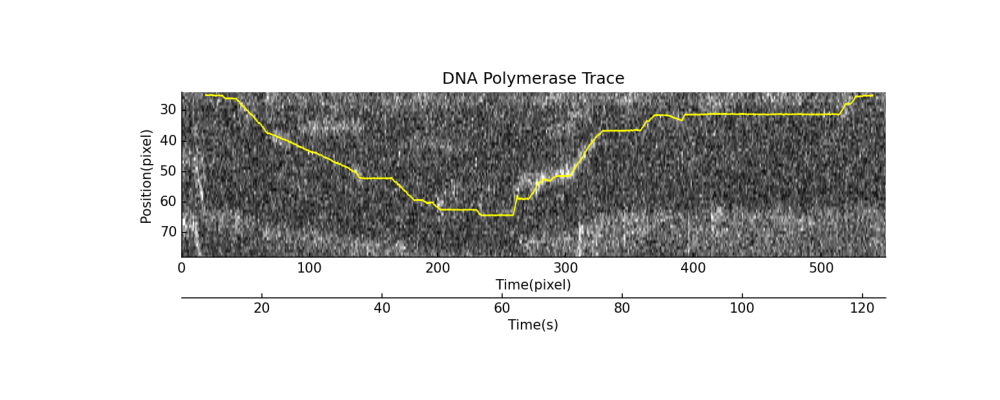

In [36]:
# plot out the overlapped DNAp trace to double check
plt.figure(figsize=(10, 4))
img = cv2.imread(cor_file4)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
plt.imshow(img, origin='upper')  # Set origin to 'upper' to match the original coordinates
plt.axis('off')

plt.show()

In [37]:
# read the correlated force data
raw_basepair = pd.read_excel(cor_file,sheet_name = 'raw_basepair')
cp_basepair = pd.read_excel(cor_file,sheet_name = 'cp_basepair')
# read the correlated image data
raw_intensity = np.loadtxt(cor_file2)
filtered_intensity = np.genfromtxt(cor_file3, delimiter=',', skip_header=1)
step_intensity = pd.read_excel(cor_file,sheet_name = 'step_intensity')
binarized_intensity = pd.read_excel(cor_file,sheet_name = 'binarized_intensity')

time_intens = binarized_intensity['time/s']
time_intens = np.array(time_intens)
intensity_raw = raw_intensity.T[1]
intensity_filtered = filtered_intensity.T[1]
intensity = binarized_intensity['binarized_intensity']
intensity = np.array(intensity)
intensity_step = step_intensity['step_intensity']
intensity_step = np.array(intensity_step)

bp_time = raw_basepair['time/s']
bp_time = np.array(bp_time)
bp = raw_basepair['raw_basepair']
bp = np.array(bp)
cp_basepair_interp = cp_basepair['cp_basepair']
cp_basepair_interp = np.array(cp_basepair_interp)

# print(raw_basepair.head())
# print(cp_basepair.head())
# print(binarized_intensity.head())

/var/folders/7s/4zb5dg7n24q8rnf1200rm98r0000gn/T/ipykernel_37098/3618248263.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,4))


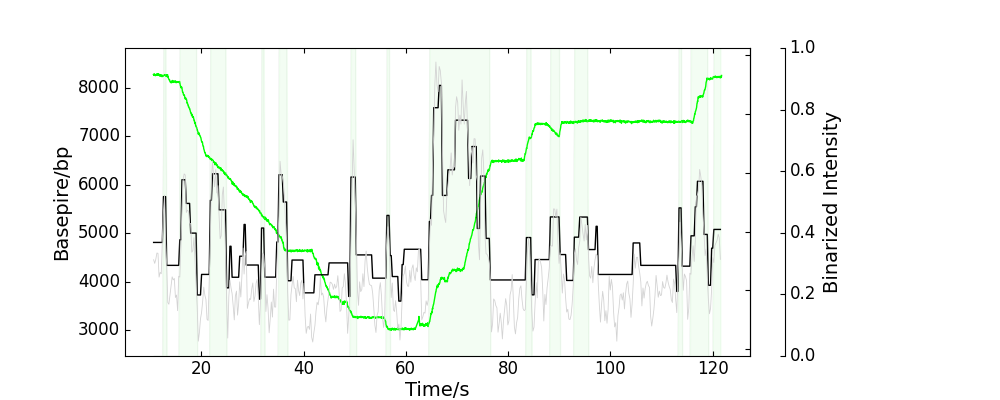

In [38]:
# plot the correlated force data and image data from step 2 to double check
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s")
host.set_ylabel("Basepire/bp")
# host.set_ylabel("DNAp Activity Burst")
par1.set_ylabel("Step-like Intensity")
par2.set_ylabel("Binarized Intensity")

p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)


# p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
p3, = par3.plot(time_intens,intensity_raw,color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.axhline(np.average(bagrnd_signal_filter)+threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--',label=str(threshold_sigma) + ' Sigma threshold')
# par1.axhline(np.average(bagrnd_signal_filter)-threshold_sigma*np.std(bagrnd_signal_filter), color='grey', linestyle='--')

par1.set_ylim(10, 77)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.ylim(6500,7800)
# plt.xlim(17,29)
plt.show()
plt.tight_layout()

# plt.savefig(cor_file.replace('-correlated_data.xlsx', '-all_correlated_data-replot.eps'), format='eps', dpi=300,bbox_inches='tight')

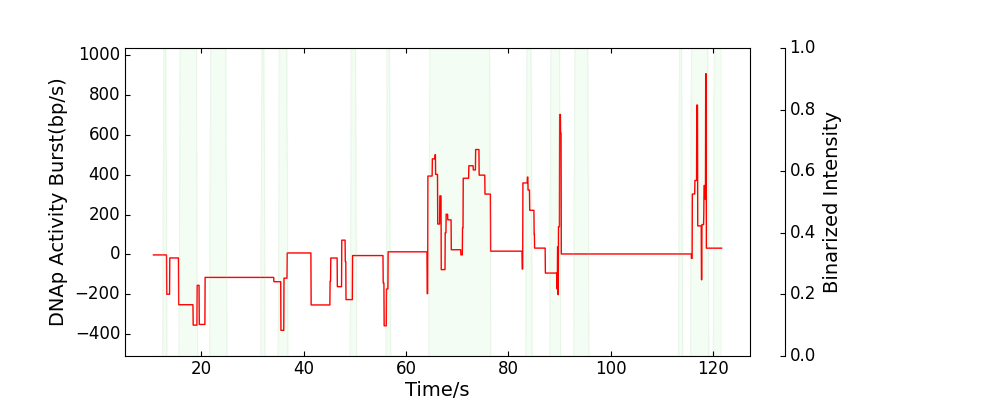

In [39]:
# plot the burst activity and fluorescence image data 
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.labelsize': 14})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
# par3 = host.twinx()

offset = 25
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlabel("Time/s")
host.set_ylabel("DNAp Activity Burst(bp/s)")
# par1.set_ylabel("Step-like Intensity",fontdict=font)
par2.set_ylabel("Binarized Intensity")

# p0, = host.plot(bp_time,bp, "lime",label = 'Basepairs',linewidth=1)

p0, = host.plot(bp_time[:-1],np.diff(cp_basepair_interp)/np.diff(bp_time),"red", label = "DNAp Activity Burst",linewidth = 1)
# p1, = par1.plot(time_intens,intensity_step,color='black',linewidth=1, label='Step-like intensity')
p2, = par2.plot(time_intens,intensity,color='lightgray',linewidth=0.1, label='Binarized Intensity')
par2.fill_between(time_intens,intensity, 0, color='lightgreen',alpha=0.1)
# p3, = par3.plot(time_intens,intensity_raw,color='lightgray',linewidth=0.6, linestyle='solid', markersize=0.5,label='Raw Intensity')

host.autoscale()
host.margins(0.1)

# par1.set_ylim(7, 87)
par2.set_ylim(0, 1)

par2.axis["right"].label.set_color(p1.get_color())
par2.axis('off')
par1.yaxis.set_ticklabels([])
par1.yaxis.set_ticks([])

# plt.xlim(32,40)
# plt.xlim(32,40)
# plt.close()
plt.show()
plt.tight_layout()

# plt.savefig(cor_file.replace('-correlated_data.xlsx', '-Activity Burst Correlates with Fluorescence Signal-zoomedin.eps'), format='eps', dpi=300,bbox_inches='tight')


# We start to plot the correlation heatmap

In [41]:
# We define a customerized correlation facor based on the combination of fluorescence and protein activity, and plot it out
# in total we get four combinations: [0,0];[0,1];[1,0];[1,1]

df_activity_data = pd.DataFrame({'Time': bp_time[:-1], 'Activity': np.diff(cp_basepair_interp)/np.diff(bp_time)})

bins = [-np.inf, -10, 20, np.inf]
labels = [1, 0, 1]
df_activity_data['BinarizedActivity'] = pd.cut(df_activity_data['Activity'], bins=bins, labels=labels, ordered=False)

df_intensity_data = pd.DataFrame({'Time': time_intens, 'Intensity': intensity})

# Interpolating activity time based on intensity time
f = interp1d(df_activity_data['Time'], df_activity_data['BinarizedActivity'])
df_activity_data_interpolated = pd.DataFrame({'Time': df_intensity_data['Time'], 
                                              'InterpolatedBinarizedActivity': f(df_intensity_data['Time'])})

# Merging the two dataframes
df_merged = pd.merge(df_intensity_data, df_activity_data_interpolated, on='Time')

# Add custom correlation column
conditions = [
    (df_merged['Intensity'] == 1) & (df_merged['InterpolatedBinarizedActivity'] == 1),
    (df_merged['Intensity'] == 0) & (df_merged['InterpolatedBinarizedActivity'] == 0),
    (df_merged['Intensity'] == 0) & (df_merged['InterpolatedBinarizedActivity'] == 1),
    (df_merged['Intensity'] == 1) & (df_merged['InterpolatedBinarizedActivity'] == 0),
]
values = [1, -1, 0.5, -0.5]

df_merged['CustomCorrelation'] = np.select(conditions, values)
print(df_merged)

           Time  Intensity  InterpolatedBinarizedActivity  CustomCorrelation
0     10.660204          0                            0.0               -1.0
1     10.873408          0                            0.0               -1.0
2     11.086612          0                            0.0               -1.0
3     11.299816          0                            0.0               -1.0
4     11.513020          0                            0.0               -1.0
..          ...        ...                            ...                ...
516  120.673510          1                            1.0                1.0
517  120.886714          1                            1.0                1.0
518  121.099918          1                            1.0                1.0
519  121.313122          1                            1.0                1.0
520  121.526327          1                            1.0                1.0

[521 rows x 4 columns]


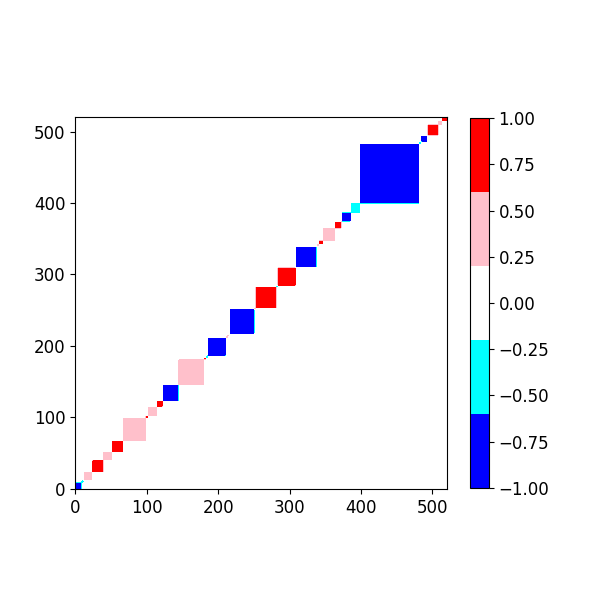

In [42]:
# We plot the correlation heatmap

# Define the size of the matrix
matrix_size = len(df_merged)

# Initialize an empty square matrix filled with zeros
matrix = np.zeros((matrix_size, matrix_size))

# Fill the diagonal from bottom-left to top-right with 'CustomCorrelation'
prev_val = df_merged['CustomCorrelation'].iat[0]
start_idx = 0
for idx, row in df_merged.iterrows():
    curr_val = row['CustomCorrelation']
    if curr_val != prev_val:
        end_idx = idx
        if np.all(matrix[matrix_size - end_idx:matrix_size - start_idx, start_idx:end_idx] == 0):
            matrix[matrix_size - end_idx:matrix_size - start_idx, start_idx:end_idx] = prev_val
        start_idx = idx
    prev_val = curr_val

# Handle the last group
if np.all(matrix[matrix_size - matrix_size:matrix_size - start_idx, start_idx:matrix_size] == 0):
    matrix[matrix_size - matrix_size:matrix_size - start_idx, start_idx:matrix_size] = prev_val

# Flip the matrix to make the y-axis ascending from bottom to top
matrix_flipped = np.flip(matrix, 0)

# Plot the matrix using plt.imshow
cmap = LinearSegmentedColormap.from_list(
    'custom', [(0, 'blue'), (0.25, 'cyan'), (0.5, 'white'), (0.75, 'pink'), (1, 'red')], N=5
)

plt.figure(figsize=(6, 6))
norm = Normalize(vmin=-1, vmax=1)
plt.imshow(matrix_flipped, origin='lower', cmap=cmap, norm=norm)
plt.colorbar(shrink=0.8)
# plt.title('Correlation Heatmap')
plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_heatmap_colorbar.eps'), format='eps', dpi=300,bbox_inches='tight')
plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_heatmap_colorbar.png'), format='png', dpi=300,bbox_inches='tight')

plt.show()
# plt.close()


In [43]:
# Initialize a dictionary to count the clusters
cluster_counts = {-1: 0, -0.5: 0, 0.5: 0, 1: 0}

# Minimum length of a sequence to be considered a cluster
min_cluster_length = 3

# Fill the diagonal from bottom-left to top-right with 'CustomCorrelation'
prev_val = df_merged['CustomCorrelation'].iat[0]
start_idx = 0
current_cluster_length = 1  # Initialize the cluster length counter
for idx, row in df_merged.iterrows():
    curr_val = row['CustomCorrelation']
    if curr_val != prev_val:
        if prev_val != 0 and current_cluster_length >= min_cluster_length:  # Count only clusters of minimum length
            cluster_counts[prev_val] += 1
        start_idx = idx
        current_cluster_length = 1  # Reset the cluster length counter
    else:
        current_cluster_length += 1  # Increment the cluster length counter
    prev_val = curr_val

# Increment the count for the last cluster if it meets the minimum length requirement
if prev_val != 0 and current_cluster_length >= min_cluster_length:
    cluster_counts[prev_val] += 1

print(cluster_counts)


{-1: 8, -0.5: 4, 0.5: 9, 1: 10}


In [45]:
def count_clusters(matrix, min_cluster_length):
    # Initialize a dictionary to count the clusters
    cluster_counts = {-1: 0, -0.5: 0, 0.5: 0, 1: 0}

    # Traverse the diagonal of the matrix
    prev_val = matrix.diagonal()[0]
    start_idx = 0
    current_cluster_length = 1
    for idx, curr_val in enumerate(matrix.diagonal()):
        if curr_val != prev_val:
            if prev_val != 0 and current_cluster_length >= min_cluster_length:
                cluster_counts[prev_val] += 1
            start_idx = idx
            current_cluster_length = 1
        else:
            current_cluster_length += 1
        prev_val = curr_val

    # Increment the count for the last cluster if it meets the minimum length requirement
    if prev_val != 0 and current_cluster_length >= min_cluster_length:
        cluster_counts[prev_val] += 1

    return cluster_counts

# Split index
split_idx = int(input("Enter the split index: "))

# Split the matrix
matrix_flipped_1 = matrix_flipped[:split_idx, :split_idx]
matrix_flipped_2 = matrix_flipped[split_idx:, split_idx:]

# Count clusters in each matrix
cluster_counts_1 = count_clusters(matrix_flipped_1, min_cluster_length=2)
cluster_counts_2 = count_clusters(matrix_flipped_2, min_cluster_length=2)

print(f"Cluster counts in first matrix: {cluster_counts_1}")
print(f"Cluster counts in second matrix: {cluster_counts_2}")


Cluster counts in first matrix: {-1: 4, -0.5: 2, 0.5: 6, 1: 5}
Cluster counts in second matrix: {-1: 5, -0.5: 3, 0.5: 4, 1: 6}


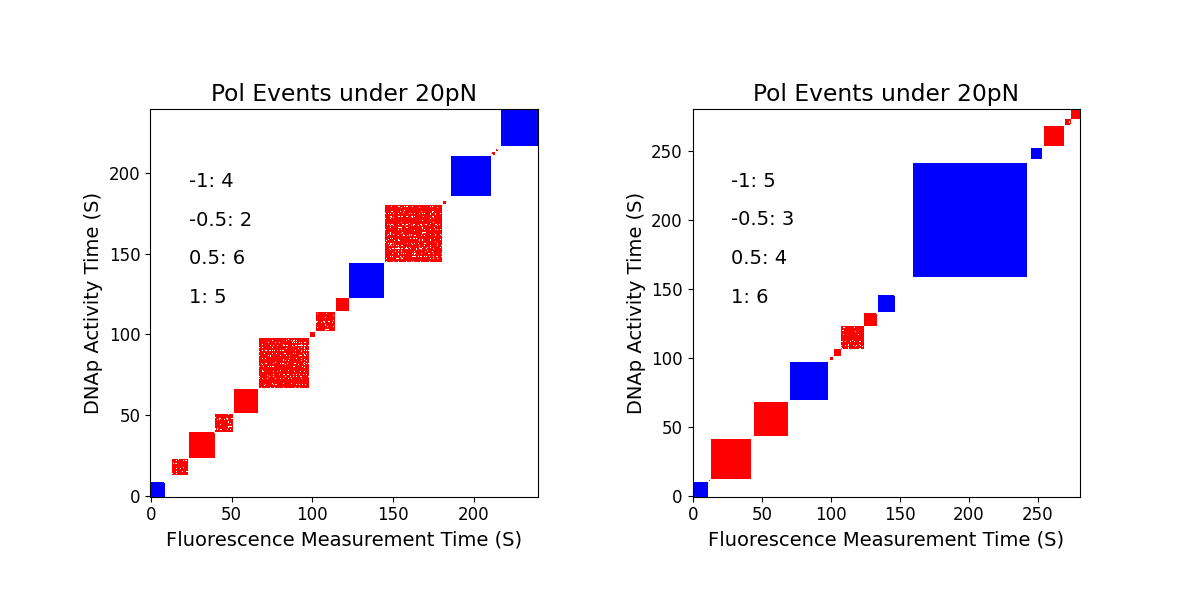

In [79]:
import json

# save the data to `heatmap_data_path`
heatmap_data_path = cor_file.replace('-correlated_data.xlsx', 'cluster_counts.json')
# Save cluster_counts_1 and cluster_counts_2 to a file
with open(heatmap_data_path, 'w') as f:
    json.dump({"cluster_counts_1": cluster_counts_1, "cluster_counts_2": cluster_counts_2}, f)

# Plot the two matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First matrix plot
im1 = ax[0].imshow(matrix_flipped_1, origin='lower', cmap=cmap, norm=norm)
ax[0].set_title("Pol Events under 20pN")
ax[0].set_xlabel("Fluorescence Measurement Time (S)")
ax[0].set_ylabel("DNAp Activity Time (S)")
# Print cluster_counts_1
for i, (key, value) in enumerate(cluster_counts_1.items()):
    ax[0].text(0.1, 0.8-i*0.1, f"{key}: {value}", transform=ax[0].transAxes)

# Second matrix plot
im2 = ax[1].imshow(matrix_flipped_2, origin='lower', cmap=cmap, norm=norm)
ax[1].set_title("Pol Events under 20pN")
ax[1].set_xlabel("Fluorescence Measurement Time (S)")
ax[1].set_ylabel("DNAp Activity Time (S)")
# Print cluster_counts_2
for i, (key, value) in enumerate(cluster_counts_2.items()):
    ax[1].text(0.1, 0.8-i*0.1, f"{key}: {value}", transform=ax[1].transAxes)


plt.subplots_adjust(wspace=0.4)  # Adjust the space between subplots
plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_exo_pol_heatmap.eps'), format='eps', dpi=300,bbox_inches='tight')
plt.savefig(cor_file.replace('-correlated_data.xlsx', '-correlation_exo_pol_heatmap.png'), format='png', dpi=300,bbox_inches='tight')

plt.show()


In [ ]:
pasue

(521, 1)
(521, 1)


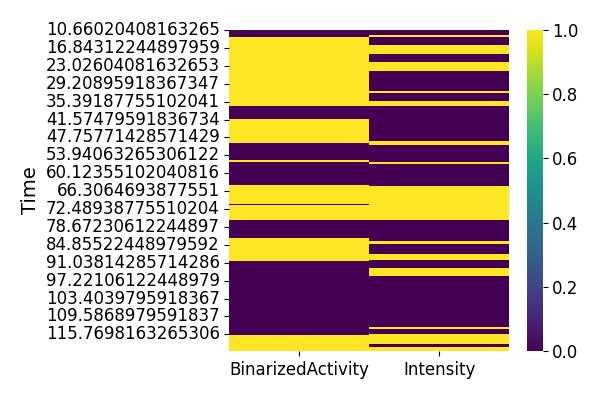

In [54]:
# plot another kind of heatmaps

# Convert your data to pandas DataFrames
df_activity = pd.DataFrame({'Time': bp_time[:-1], 'BinarizedActivity': df_activity_data['BinarizedActivity']})
df_intensity = pd.DataFrame({'Time': time_intens, 'Intensity': intensity})

# Set Time as index
df_activity.set_index('Time', inplace=True)
df_intensity.set_index('Time', inplace=True)

# Interpolate df_activity to match the number of data points in df_intensity
df_activity_resampled = df_activity.reindex(df_intensity.index, method='nearest')

# Create the matrix for heatmap
heatmap_data = pd.DataFrame({'BinarizedActivity': df_activity_resampled['BinarizedActivity'], 'Intensity': df_intensity['Intensity']})

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, cmap='viridis')
plt.tight_layout() 
plt.show()


# we start to analyze all the correlation heatmaps data

Total data sets analyzed: 1


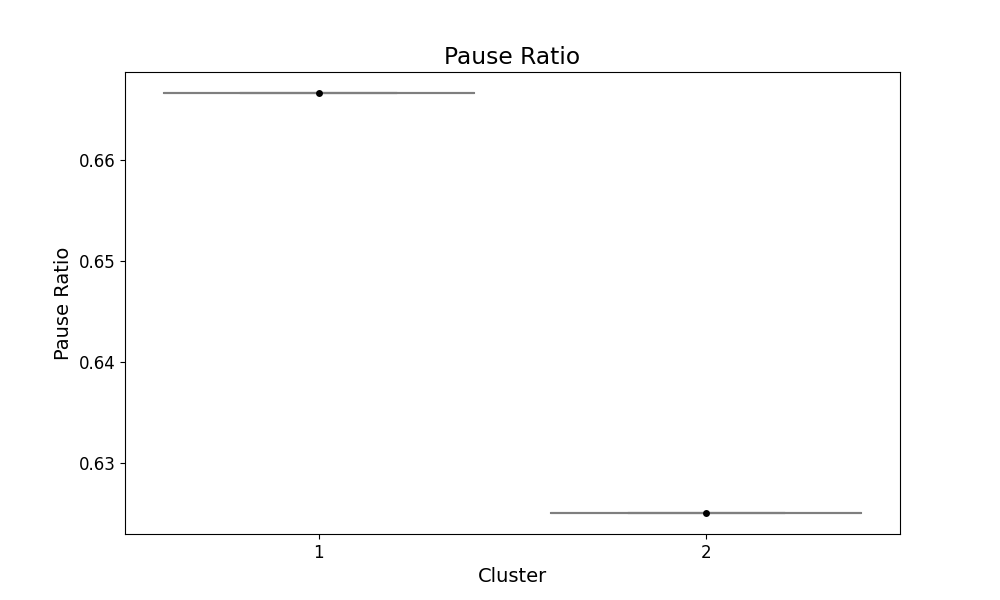

In [86]:
import os
import glob
import json

# Change the working directory to your root directory
os.chdir('/Users/longfu/Library/CloudStorage/OneDrive-VrijeUniversiteitAmsterdam/0-DNAp_project_updated_May2023/RawData_ProcessingData')

# Find all JSON files
json_files = glob.glob('**/*.json', recursive=True)

# Initialize a DataFrame to store pause_ratio
pause_ratios = pd.DataFrame(columns=['Pause Ratio', 'Cluster'])

data_set_counter = 0
# Iterate over the json files
for json_file in json_files:
    # Load the json file
    with open(json_file) as f:
        data = json.load(f)
    data_set_counter += 1  # Increment the counter by 1 for each data set
    
    # Compute the pause_ratio for each part of the dataset
    for key in ['cluster_counts_1', 'cluster_counts_2']:
        if '-1' in data[key] and '-0.5' in data[key]:
            pause_ratio = data[key]['-1'] / (data[key]['-1'] + data[key]['-0.5'])
            pause_ratios = pd.concat([pause_ratios, pd.DataFrame({'Pause Ratio': [pause_ratio], 'Cluster': [key[-1]]})], ignore_index=True)

print(f"Total data sets analyzed: {data_set_counter}")

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Pause Ratio', data=pause_ratios, color='lightgray')
sns.swarmplot(x='Cluster', y='Pause Ratio', data=pause_ratios, color='black')
plt.title('Pause Ratio')
plt.show()
# plt.close()